In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
model=LinearRegression()

In [54]:
df=pd.DataFrame({
    'Weight':np.arange(60,100,1),
    'Height':np.arange(40,120,2)
})


<Axes: xlabel='Weight', ylabel='Height'>

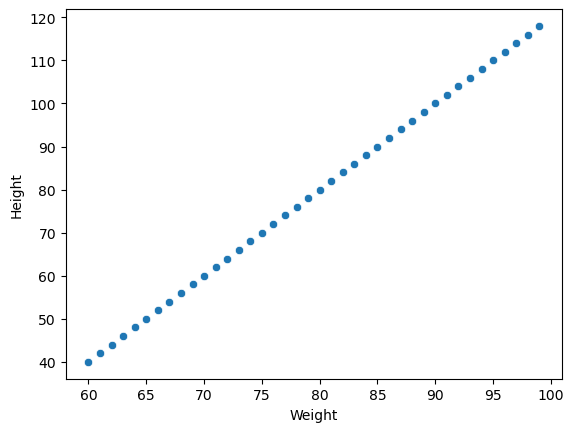

In [55]:
sns.scatterplot(x=df['Weight'],y=df['Height'])

In [56]:
df.corr()

,Weight,Height
Weight,1.0,1.0
Height,1.0,1.0


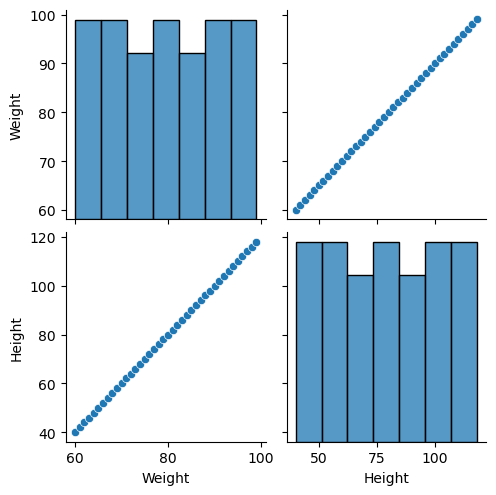

In [57]:
sns.pairplot(df)

In [58]:
x=np.array(df['Weight']).reshape(-1,1) # independent features should be in df or 2d array.
X=df[['Weight']] # df
y=np.array(df['Height']) # dependent features can be in series or 1d array 
# display(X)
# display(x)

In [59]:
# Train, Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25)

In [60]:
X_train.shape

(30, 1)

In [61]:
# Standardization 
from sklearn.preprocessing import StandardScaler


In [62]:
scaler=StandardScaler()
X_train_standardization=scaler.fit_transform(X_train)

In [63]:
X_test_standardization=scaler.transform(X_test)

In [64]:
model.fit(X_train_standardization,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [65]:
display(model.coef_) # coef and slope -> m

array([24.10172885])

In [66]:
display(model.intercept_) # intercept -> c

np.float64(79.80000000000001)

In [67]:
# Equation of straight line, y=21.60*x + 79.73

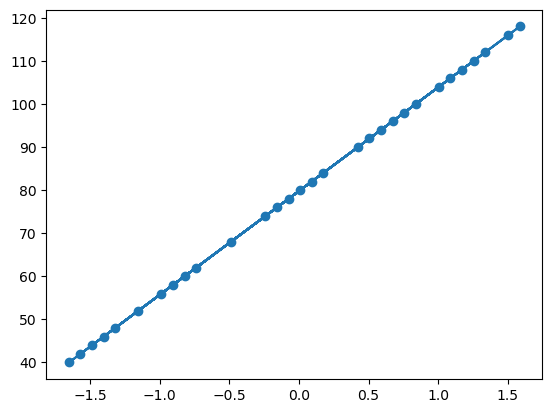

In [68]:
# plot for train data
plt.scatter(X_train_standardization,y_train)
plt.plot(X_train_standardization,model.predict(X_train_standardization))

In [69]:
prediction=model.predict([[14]])
display(prediction)
coeff=model.coef_
slope=model.intercept_
display(coeff)
display(slope)

array([417.22420383])

array([24.10172885])

np.float64(79.80000000000001)

In [70]:
model

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [71]:
y_pred=model.predict(X_test_standardization)

#### MSE,MAE,RMSE, R squared , Adjusted R squared 

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [73]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)
display(mse)
display(mae)
display(rmse)
display(r_squared)

5.048709793414476e-30

7.105427357601002e-16

2.2469334198890887e-15

1.0

#### OLS Linear Regression

In [74]:
import statsmodels.api as sm

In [75]:
model=sm.OLS(y_train,X_train_standardization).fit()

In [76]:
prediction=model.predict(X_test)

In [77]:
display(prediction)

24    2024.545223
12    1735.324477
7     1614.815833
23    2000.443494
37    2337.867698
5     1566.612375
15    1807.629663
13    1759.426206
16    1831.731392
31    2193.257325
dtype: float64

In [78]:
display(model.summary())

/home/test-14900/anaconda3/envs/conda-env-3-11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/test-14900/anaconda3/envs/conda-env-3-11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/home/test-14900/anaconda3/envs/conda-env-3-11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1687: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
/home/test-14900/anaconda3/env

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.084
Model:                            OLS   Adj. R-squared (uncentered):              0.052
Method:                 Least Squares   F-statistic:                              2.645
Date:                Sun, 18 Jan 2026   Prob (F-statistic):                       0.115
Time:                        20:43:35   Log-Likelihood:                         -173.95
No. Observations:                  30   AIC:                                      349.9
Df Residuals:                      29   BIC:                                      351.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            24.1017     14.818      1.626      0.115      -6.205      54.409
==============================================================================
Omnibus:                        6.965   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.058
Skew:                          -1.014   Prob(JB):                       0.0484
Kurtosis:                       2.144   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""